# Acceleration

Acceleration methods are techniques used to improve the convergence rate of numerical algorithms. They are commonly applied to problems such as solving nonlinear equations, numerical integration, numerical differentiation, and accelerating the convergence of infinite series. Acceleration methods can be categorized into iterative algorithms, recursive algorithms, and series acceleration methods. Each method has its advantages and limitations in different problem scenarios.

## Iterative algorithms

In nature, Iterative algorithms are iterative and require an initial guess to start with. They update the guess in each iteration until convergence is achieved. Generally applicable for solving nonlinear equations, but they need a suitable initial value to ensure convergence. They may not be as effective as other methods in certain scenarios.

### Newton-Raphson method  

This root-finding algorithm uses derivative information to iteratively improve an initial guess of the root. It is commonly employed for solving nonlinear equations. Highly efficient when the derivative is easy to compute and a good initial estimate is available. However, it may have slow convergence or not converge at all if these conditions are not met.

### Secant method  

This root-finding algorithm approximates the derivative using a finite difference formula. Similar to the Newton-Raphson method, it does not require the evaluation of derivatives and is often used for solving nonlinear equations. Its convergence rate is usually slower than the Newton-Raphson method but provides better efficiency when the derivative is not easily computable.

## Recursive algorithms

In nature, Recursive algorithms are recursive and construct higher-precision approximations from a finite number of approximations with limited precision. They usually provide high accuracy in scenarios like numerical integration and differentiation. Although they require a relatively larger amount of computation, they can generally be accelerated through parallel computation.

### Richardson Extrapolation

Richardson extrapolation is named because of Lewis Fry Richardson, which is a sequence acceleration method used to improve the rate of convergence of a sequence of estimates of some value $A^*=\lim\limits_{n→0}A(n)$.

This recursive algorithm enhances the accuracy of numerical approximations by combining lower-order approximations to obtain a higher-order approximation. It is frequently used in numerical integration and differentiation. It requires a relatively larger amount of computation but can be accelerated through parallel computation.

$$\begin{aligned}
R_1(n) &= \frac{(n+1)A(n+1)-h*A(n)}{1!} \\
R_2(h) &= \frac{(n+2)^2A(n+1)-2(n+1)^2A(n+1)+n^2A(n)}{2!}
\end{aligned}$$


In [ ]:
# Richardson Extrapolation

import numpy as np
import matplotlib; import matplotlib.pyplot as plt

X,Y = np.loadtxt('../Appendix Data Manipulation/Data/Progressive0.dat', unpack=True)
count = len(X)

def RE1(Y):
    R1 = np.ones(count)
    for i in range(0, count - 1):
        if i < count - 1 :
            R1[i] = ((i+1)*Y[i+1]-i*Y[i])/np.math.factorial(1)
        else:
            R1[i] = 0
        i = i + 1
    return R1

def RE2(Y):
    R2 = np.ones(count)
    for i in range(0, count - 2):
        if i < count - 2 :
            R2[i] = ((i+2)**2*Y[i+2]-2*(i+1)**2*Y[i+1]+i**2*Y[i])/np.math.factorial(2)
        else:
            R2[i] = 0
        i = i + 1
    return R2

U1 = RE1(Y)
U2 = RE2(Y)

plt.figure(dpi=128); params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
matplotlib.rcParams.update(params)
plt.tick_params(direction="in",top=True,right=True,bottom=True,left=True)

plt.title("Richardson Extrapolation")
plt.plot(X, Y, "o", c="#B4B4B4", label="Source data")
plt.plot(X[0:len(U1)-1], U1[0:len(U1)-1], c="#0078E1", label="Richardson transformation")
plt.plot(X[0:len(U2)-2], U2[0:len(U1)-2], c="#8C64F0", label="Second richardson transformation")
plt.legend(loc="best")

### Aitken's Delta-Squared Method

This recursive algorithm employs the second differences of a sequence to accelerate the convergence of the sequence. It is similar to Richardson extrapolation but requires the sequence to converge to a limit. It may not be as effective as other methods in some scenarios.


## Series acceleration methods

Series acceleration methods transform a given infinite series into another one with faster convergence by manipulating its terms in various ways. They are advantageous in accelerating the convergence of infinite series but may not be the best choice for other problems, such as solving nonlinear equations.

### Shanks Transformation

Shanks transformation, also known as the Epsilon algorithm, is a non-linear series acceleration method designed to increase the rate of convergence of a sequence. This method was developed by Daniel Shanks in the 1950s.

The Shanks transformation is based on the idea of creating a new sequence from the original one, which converges more rapidly to the same limit. The transformed sequence is constructed by considering the differences between consecutive terms of the original sequence and applying a specific formula. The process can be applied iteratively to further improve the convergence rate.

This series acceleration method accelerates the convergence of a slowly converging series by transforming it into a more rapidly converging series. It is commonly used for the summation of infinite series. However, it may not be the best choice for series that already exhibit a fast convergence rate.

We introduce a convergent sequence $\{a_n\}_{n\in\mathbb{N}}$, the sum of the first $i$ terms can be described as $ S_i = \sum\limits_{n=0}^{i}a_n $, and forms a new sequence $\{S_i\}_{i\in\mathbb{N}}$.

Provided the series converges, $S_i$ will also converge to $S$ as $n→∞$. The Shanks transformation $L(S_i)$ is defined by:

$$\begin{aligned}
L(S_i) &= S_{i+1} - \frac{(S_{i+1}-S_i)^2}{(S_{i+1}-S_i)-(S_i-S_{i-1})} \\ 
&= \frac{S_{i+1}S_{i-1}-S_i^2}{S_{i+1}-2S_i+S_{i-1}}\end{aligned}$$

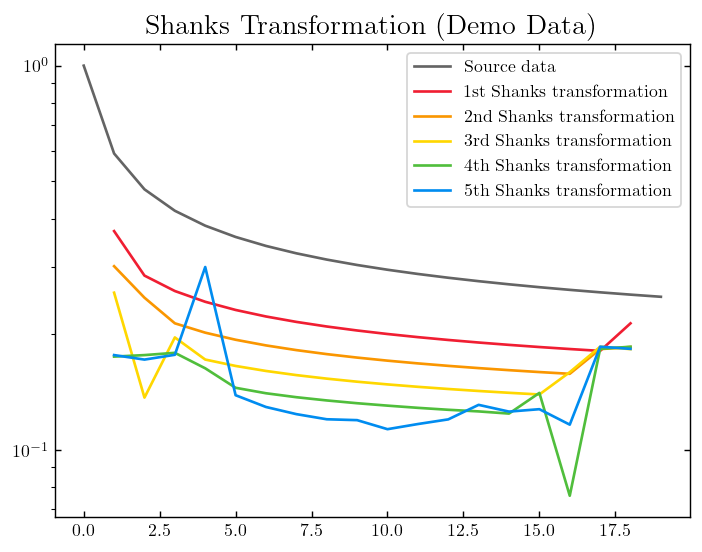

In [121]:
# Shanks Transformation

import numpy as np
import matplotlib.pyplot as plt

def shanks_transformation_vectorized(data):
    shifted_left = np.roll(data, -1)
    shifted_right = np.roll(data, 1)

    numerator = data ** 2 - shifted_right * shifted_left
    denominator = 2 * data - shifted_right - shifted_left

    transformed_data = np.where((np.arange(len(data)) > 0) & (np.arange(len(data)) < len(data) - 1), numerator / denominator, 0)
    
    return transformed_data

def apply_shanks_transformations(data, num_iterations):
    return [data := shanks_transformation_vectorized(data) for _ in range(num_iterations+1)]

# Generate a new dataset using the function f(x) = 1/(1+log(x+1))
X_demo = np.arange(0, 20); Y_demo = 1/(1+np.log(X_demo+1))

# Apply Shanks transformations
num_iterations = 5
transformed_data_list_demo = apply_shanks_transformations(Y_demo, num_iterations)

# Set up the specified style parameters
plt.figure(dpi=128)
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", top=True, right=True, bottom=True, left=True)

# Plot the new data and Shanks transformations
plt.title("Shanks Transformation (Demo Data)")
plt.plot(X_demo, Y_demo, c="#646464", label="Source data")

colors = ["#F01E32", "#FA9600", "#FFD700", "#50BE3C", "#008CF0", "#8C64F0"]
labels = ["1st Shanks transformation", "2nd Shanks transformation", "3rd Shanks transformation", "4th Shanks transformation", "5th Shanks transformation", "6th Shanks transformation"]

for i in range(1, num_iterations + 1):
    transformed_data = transformed_data_list_demo[i]
    plt.plot(X_demo[1:len(transformed_data)-1], transformed_data[1:len(transformed_data)-1], c=colors[i-1], label=labels[i-1])

plt.yscale('log')
plt.legend(loc="best")
plt.show()


### Wynn's Epsilon Algorithm 

This series acceleration method improves the rate of convergence of a series by using a sequence of partial sums and their differences to construct a new sequence that converges faster than the original sequence. Similar to the Shanks transformation, it is excellent for accelerating slowly converging series but may be unstable in some situations, leading to a decrease in convergence rate.